## Jungo simetrizatorių pavyzdys

<a href="https://colab.research.google.com/github/uqglmn/groups/blob/main/Pavyzdys_S3_Jungo_simetrizatoriai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Šiame pavyzdyje Jungo simetrizatorių pagalba blok-diagonalizuosime reguliarų $S_3$ įvaizdį. To pasekoje sukonstruosime visus neredukuojamus $S_3$ įvaizdžius.

**Pastaba.** Šis pavyzdys tik iš dalies iliustruoja įvaizdžių konstravimo procedūrą Jungo simetrizatorių pagalba, nes SymPy neturi kai kurių simbolinės algebros realizacijos galimybių.

In [1]:
# Bibliotekos
import sympy as sym
import numpy as np

# Kronekerio delta
from sympy.functions.special.tensor_functions import KroneckerDelta as delta
from sympy.matrices.expressions import trace

# Renderinimo nustatymas
sym.init_printing(use_unicode=True)

In [2]:
# Grupės S3 eilė
ng = 6

In [3]:
# funkcija vektorių normavimui
def normalise(v):
    n = 1/sym.sqrt((v.T * v)[0])
    return n*v

### Reguliarusis įvaizdis

In [4]:
# Grupės S3 algebros bazė
pe   = sym.Matrix([[1,0,0,0,0,0]]).T
p12  = sym.Matrix([[0,1,0,0,0,0]]).T
p23  = sym.Matrix([[0,0,1,0,0,0]]).T
p13  = sym.Matrix([[0,0,0,1,0,0]]).T
p123 = sym.Matrix([[0,0,0,0,1,0]]).T
p321 = sym.Matrix([[0,0,0,0,0,1]]).T

basis = [pe, p12, p23, p13, p123, p321]

In [5]:
# Reguliarus matricinis ivaizdis
Re   = sym.Matrix([[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1]])
R12  = sym.Matrix([[0,1,0,0,0,0],[1,0,0,0,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1],[0,0,1,0,0,0],[0,0,0,1,0,0]])
R23  = sym.Matrix([[0,0,1,0,0,0],[0,0,0,0,0,1],[1,0,0,0,0,0],[0,0,0,0,1,0],[0,0,0,1,0,0],[0,1,0,0,0,0]])
R13  = sym.Matrix([[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1],[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0]])
R123 = sym.Matrix([[0,0,0,0,0,1],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,1,0,0,0,0],[1,0,0,0,0,0],[0,0,0,0,1,0]])
R321 = sym.Matrix([[0,0,0,0,1,0],[0,0,0,1,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,0,0,1],[1,0,0,0,0,0]])

rep_R = [Re, R12, R23, R13, R123, R321]

### Jungo simetrizatoriai

Grupė $S_3$ turi tris Jungo diagramas žymimas skirstiniais (3), (2,1) ir (1,1,1)

- Jungo diagrama (3) turi vieną standartinį tablo: [1,2,3]. Jis atitinka trivialų įvaizdį.
- Jungo diagrama (2,1) turi du standartinius tablo: [1,2][3] ir [1,3][2]. Jie atitinka standartinį įvaizdį.
- Jungo diagrama (1,1,1) turi vieną standartinį tablo: [1][2][3]. Jis atitinka alternuojantį įvaizdį.

Jungo simetrizatoriai:

$
Y_\Lambda = P_\Lambda Q_\Lambda
$

kur $P_\Lambda = \sum_{p \in R_{\Lambda}} p$ ir $Q_\Lambda = \sum_{p \in C_{\Lambda}} (-1)^p p$ yra eilučių ir stulpelių simetrizatoriai.

#### Jungo simetrizatoriai kaip vektoriai-stulpeliai

Ši Jungo simetrizatorių forma yra patogi mūsų keliamam tikslui, reguliaraus įvaizdžio blok-diagonalizavimui. 

In [6]:
# Jungo tablo [1,2,3]
Row = Re + R12 + R23 + R13 + R123 + R321
Col = pe
Y_triv = sym.Rational(1,6) * Row * Col

In [7]:
# Jungo tablo [1,2][3]
Row = Re + R12
Col = pe - p13
Y_st_1 = sym.Rational(2,6) * Row * Col

In [8]:
# Jungo tablo [1,3][2]
Row = Re + R13
Col = pe - p12
Y_st_2 = sym.Rational(2,6) * Row * Col

In [9]:
# Jungo tablo [1][2][3]
Row = Re
Col = pe - p12 - p23 - p13 + p123 + p321
Y_alt = sym.Rational(1,6) * Row * Col

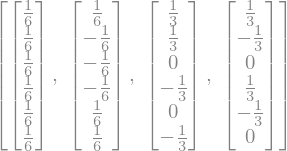

In [10]:
# Jungo simetrizatorių vektorių-stulpelių forma
Y = [Y_triv, Y_alt, Y_st_1, Y_st_2]
Y

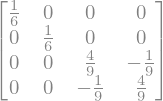

In [11]:
# Pastaba: šie vektoriai nėra orotogonalūs įprastinės skaliarinės sandaugos atžvilgiu
M = sym.zeros(4,4) 
for i in range(4):
    for j in range (4):
        M[i,j] = Y[i].T * Y[j]
M

#### Jungo simetrizatoriai kaip matricos

Ši Jungo simetrizatorių forma nėra patogi mūsų keliamam tikslui, tačiau padeda iliustruoti simetrizatorių pilnumo ir ortogonalumo savybes.

In [12]:
# Jungo tablo [1,2,3]
Row = Re + R12 + R23 + R13 + R123 + R321
Col = Re
RY_triv = sym.Rational(1,6) * Row * Col

In [13]:
# Jungo tablo [1,2][3]
Row = Re + R12
Col = Re - R13
RY_st_1 = sym.Rational(2,6) * Row * Col

In [14]:
# Jungo tablo [1,3][2]
Row = Re + R13
Col = Re - R12
RY_st_2 = sym.Rational(2,6) * Row * Col

In [15]:
# Jungo tablo [1][2][3]
Row = Re
Col = Re - R12 - R23 - R13 + R123 + R321
RY_alt = sym.Rational(1,6) * Row * Col

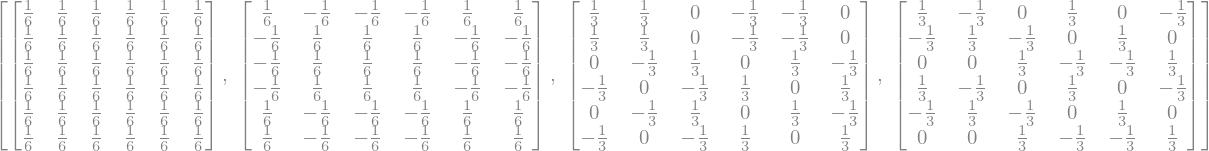

In [16]:
# Jungo simetrizatorių matricinė forma
RY = [RY_triv, RY_alt, RY_st_1, RY_st_2]
RY

In [17]:
# Pilnumo sąlygos patikrinimas: simetrizatorių suma turi duoti vienetinę matricą
RY[0] + RY[1] + RY[2] + RY[3] == sym.eye(6)

True

In [18]:
# Simetrizatorių ortogonalumo patikrinimas:
# Y_i * Y_j = delta_ij Y_i
M = np.zeros((4,4), dtype = bool) 
for i in range(4):
    for j in range (4):
        M[i,j] = sym.simplify(RY[i] * RY[j] == delta(i,j) * RY[i])
M

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

### Įvaizdžių konstravimas

Prisiminkite, kad

$
V_{\rm R} = V_{\rm triv} \oplus  V_{\rm alt} \oplus  V_{\rm st} \oplus  V_{\rm st}
$

Jungo simetrizatoriai, kuriuos sukonstravome aukščiau yra vektoriai šiuose įvaizdžiuose:

- $Y_{\rm triv} \in V_{\rm triv}$

- $Y_{\rm alt} \in V_{\rm alt}$

- $Y_{\rm st1} \in V_{\rm st}$ (pirmoji kopija)

- $Y_{\rm st2} \in V_{\rm st}$ (antroji kopija)

Mums tereikia surasti likusius du vektorius pirmoje ir antroje $V_{\rm st}$ kopijose.

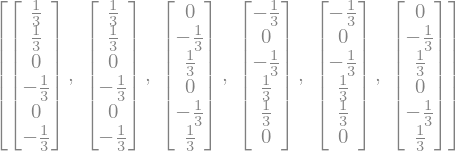

In [19]:
# veikiame su reguliariu įvaizdžiu į vektorių Y_st_1 ir gauname vektorių sarašą apvelkantį pirmą erdvę V_st
B = []
for R in rep_R:
    B.append(R * Y_st_1)
B

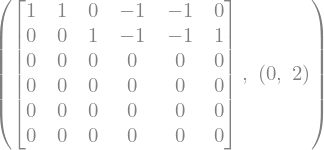

In [20]:
# Apvelkantį sąrašą paverčiame matrica
C = sym.Matrix(np.array(B).reshape(ng,ng)).T
# redukuota ešolono forma - iš jos matome, kad galime imti vektorius 1 ir 3 kaip tiesiškai nepriklausomus
C.rref()

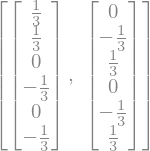

In [21]:
# Pirmos erdvės V_st bazė
B_st_1 = [B[0], B[2]]
B_st_1

In [22]:
# veikiame su reguliariu įvaizdžiu į vektorių Y_st_2 ir gauname vektorių sarašą apvelkantį antrą erdvę V_st
B = []
for R in rep_R:
    B.append(R * Y_st_2)

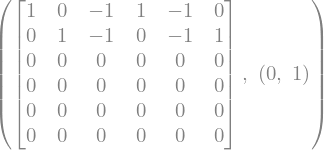

In [23]:
# Apvelkantį sąrašą paverčiame matrica
C = sym.Matrix(np.array(B).reshape(ng,ng)).T
# redukuota ešolono forma - iš jos matome, kad galime imti vektorius 1 ir 2 kaip tiesiškai nepriklausomus
C.rref()

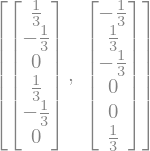

In [24]:
# Antros erdvės V_st bazė
B_st_2 = [B[0], B[1]]
B_st_2

### Reguliaraus įvaizdžio blok-diagonalizavimas

Atlikę aukščiau aprašytus veiksmus suradome bazę, kurioje reguliarus įvaizdis yra blok-diagonalus:

``
Nauja bazė = [ Y_triv, Y_alt, B_st_1[0], B_st_1[1], B_st_2[0], B_st_2[1] ]
``

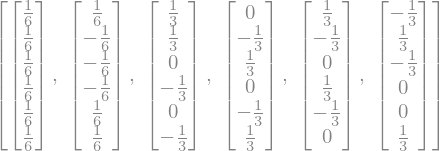

In [25]:
# Nauja reguliaraus įvaizdžio bazė
new_basis = [Y_triv, Y_alt] + B_st_1 + B_st_2
new_basis

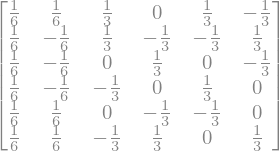

In [26]:
# Naują bazę paverčiame matrica
C = sym.Matrix(np.array(new_basis).reshape(ng,ng)).T
C

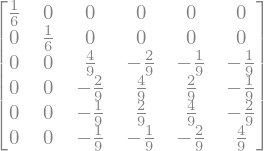

In [27]:
# Pastaba: mūsų nauja bazė nėra ortonormali įprastinės vektorių skaliarinės sandaugos atžvilgiu
# Todėl blok-diagonalizavimas šia matrica duos ne unitarų įvaizdį 
C.T * C

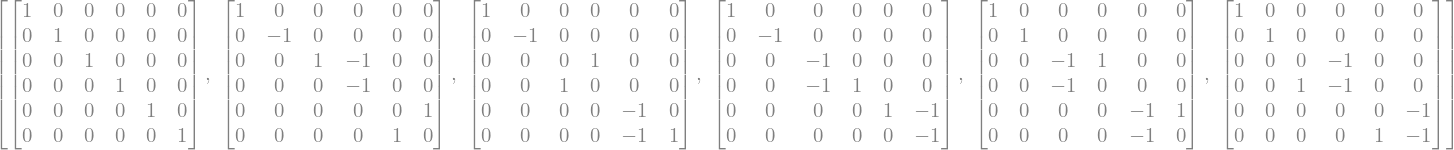

In [28]:
# Blok-diagonalizavimas
rep_R_bd = []
for i in range(6):
    rep_R_bd.append(C.inv()*rep_R[i]*C)
rep_R_bd

Gautas įvaizdis nėra unitarus. Mums reikia surasti panašumo transformacią, kuri unitarizuotų šį įvaizdį.

### Įvaizdžio unitarizavimas

Unitarizavimo procedūra:

$
\rho_V(g) \mapsto S \rho_V(g) S^{-1}
$

kur

$
S = \sqrt{\sum_{g \in G} \rho_V(g)^\dagger \rho_V(g)} 
$

Matricos kėlimas laipsniu:

$
M^a = P D^a P^{-1}
$

kur $D$ yra diagonali tikrinių verčių matrica, o $P$ - diagonalizavimo matrica.

In [29]:
# Apibrėžiame funkciją, kur suranda matricos šaknį
def matrix_sqrt(M):
    P, D = M.diagonalize()
    for i in range(D.shape[0]):
        D[i,i] = sym.sqrt(D[i,i])
    return P * D * P.inv()

In [30]:
# Ermitinis jungtinumas
from sympy.physics.quantum import Dagger

In [31]:
# Surandame unitarizavimo matricą
S = sym.zeros(6)
for R in rep_R_bd:
    S += Dagger(R) * R
S = matrix_sqrt(S)

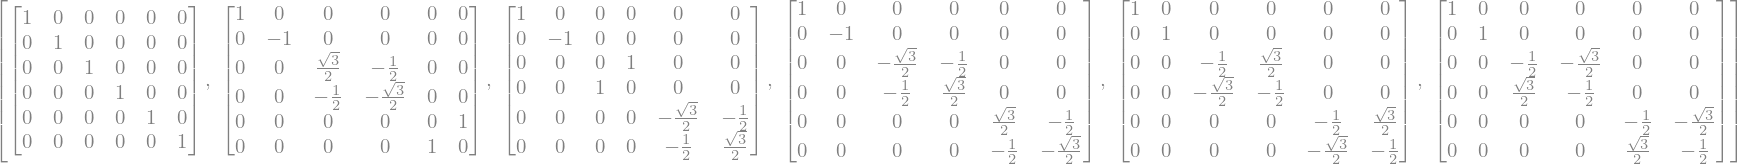

In [32]:
# Įvaizdžio unitarizavimas
rep_R_bdu = []
for i in range(6):
    rep_R_bdu.append(sym.simplify(S*rep_R_bd[i]*S.inv()))
rep_R_bdu

### Įvaizdžio išskaidymas į neredukuojamus įvaizdžius

In [33]:
# Trivialus įvaizdis
rep_triv = []
for i in range(6):
    rep_triv.append(rep_R_bdu[i][0,0])
rep_triv

In [34]:
# Alternuojantis įvaizdis
rep_alt = []
for i in range(6):
    rep_alt.append(rep_R_bdu[i][1,1])
rep_alt

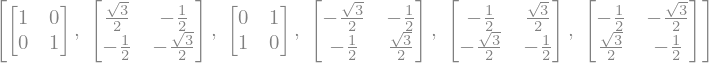

In [35]:
# Standartinis įvaizdis - pirma forma
rep_st_1 = []
for i in range(6):
    rep_st_1.append(rep_R_bdu[i][2:4,2:4])
rep_st_1

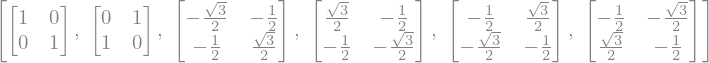

In [36]:
# Standartinis įvaizdis - antra forma
rep_st_2 = []
for i in range(6):
    rep_st_2.append(rep_R_bdu[i][4:,4:])
rep_st_2

In [37]:
# Dvi standartinio įvaizdžios formos yra ekvivalentiškos, nes jų charakteriai sutampa
char_st_1 = list(map(trace,rep_st_1))
char_st_2 = list(map(trace,rep_st_2))
[char_st_1, char_st_2]

### Panašumo transformacija

Šuro lema teigia, kad egzistuoja unikalus, iki skaliarinio daugiklio, matricinis operatorius $F \in {\rm Mat}_{2\times2}(\mathbb{C})$ toks, kad

$
\rho_{\rm st 1}(p) F = F \rho_{\rm st 2}(p)  
$

visiems $p \in S_3$.

Sąlyga užrašyta viršuje yra ne kas kita, o tiesinių lygčių sistema matricai $F$.

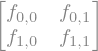

In [38]:
# Simbolinė matrica F
F = sym.MatrixSymbol('f', 2, 2).as_explicit()
F

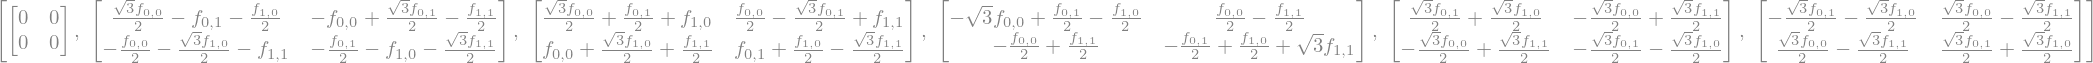

In [39]:
# Tiesinių lygčių sistema
A = []
for i in range(6):
    A.append(rep_st_1[i] * F - F * rep_st_2[i])
A

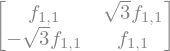

In [40]:
# Lygčių sistemos sprendimas ir atsakymo įstatymas į matricą F
F.subs(sym.solve(A, F))

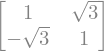

In [41]:
# Pasirenkame bet kokią ne nulinę f_11 vertę, pavyzdžiui f_11 = 1 
C = F.subs(sym.solve(A, F)).subs({F[1,1]:1})
C

In [42]:
# Patikrinime, kad matrica C yra norima panašumo transformacija
rep_st_1_new = []
for i in range(6):
    rep_st_1_new.append(C.inv() * rep_st_1[i] * C)
    
rep_st_2 == rep_st_1_new

True